In [6]:
import cv2
import easyocr
import numpy as np

reader = easyocr.Reader(
    ['en'],
    gpu=False,
    recog_network='best_norm_ED',
    detect_network="dbnet18",
    user_network_directory='../models',
    model_storage_directory='../models',
) # this needs to run only once to load the model into memory


# Read image as numpy array
image = cv2.imread('../examples/kz_book_simple.jpeg')

# Rotate the image by 270 degrees
# image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Convert the image from BGR to RGB (because OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Using CPU. Note: This module is much faster with a GPU.


In [7]:
results = reader.readtext(image = image)

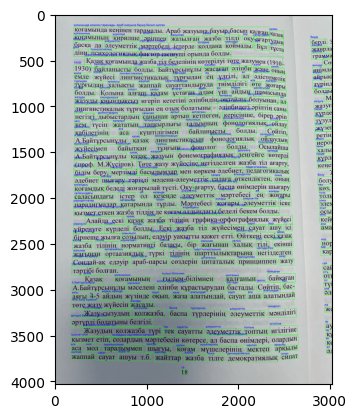

In [8]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Load custom font
font_path = "./Ubuntu-Regular.ttf"
font = ImageFont.truetype(font_path, 32)

# Display the results
for (bbox, text, prob) in results:
    # Get the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = (int(top_left[0]), int(top_left[1]))
    bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

    # Draw the bounding box on the image
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Convert the OpenCV image to a PIL image, draw the text, then convert back to an OpenCV image
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(image_pil)
    draw.text((top_left[0], top_left[1] - 40), text, font=font, fill=(0, 0, 255))
    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)

# Save image
cv2.imwrite('./model_output.jpg', image)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# results


In [9]:
results

[([[203, 141], [2328, 141], [2328, 240], [203, 240]],
  'қоғамында кеңінен тарамады. Араб жазуына бауыр басып қалған',
  0.786300717080504),
 ([[205, 231], [589, 231], [589, 288], [205, 288]],
  'қоғамының',
  0.7816695912750177),
 ([[627, 240], [921, 240], [921, 296], [627, 296]],
  'күрилше',
  0.3350862709527511),
 ([[953, 225], [1221, 225], [1221, 310], [953, 310]],
  'әрішен',
  0.5551235737292934),
 ([[1254, 248], [1573, 248], [1573, 300], [1254, 300]],
  'жазылған',
  0.9746735006729742),
 ([[1605, 230], [1809, 230], [1809, 305], [1605, 305]],
  'жазба',
  0.8179674628133147),
 ([[1839, 220], [2010, 220], [2010, 301], [1839, 301]],
  'тілді',
  0.9998740227719123),
 ([[2043, 239], [2166, 239], [2166, 307], [2043, 307]],
  'оқу',
  0.9984390629719919),
 ([[198, 293], [517, 293], [517, 382], [198, 382]],
  'басқа да',
  0.9323530898850395),
 ([[538, 316], [893, 316], [893, 378], [538, 378]],
  'әлеуметтік',
  0.7024451661868156),
 ([[920, 311], [1525, 311], [1525, 397], [920, 397]

In [10]:
reader.readtext(image = image, paragraph=True)

[[[[158, 96], [2649, 96], [2649, 3789], [158, 3789]],
  "қоғамында кеңінен тарамады. Араб жазуына бауыр басып қалған қоғамында кенінен қазақ қоғамының тарамады. Арабанказуың оа уырдбасъақу қатарады. күрилше жазылған ұуы оқу сағартудын қазақ бықад да 179 амынын кирилшен е жазылған жазба тілді мәрте оқу әлеуметтік сер қоймады у5 1 қолдана арттдыр басқа тұста діни да әлетметтік 17 әстерде қолдана қоймады 11 орында 1ә Бүл 1сихологиялык тста дінқзаққоа -е07 инадеыік разииепзушші орында болды 1930) қазақ қоғамында жазба тыы бекелінің көтерілуі төлеижазуәнен (1910 байланысты болды Байтұрсынұлы жасаған а7 кер 'және оның 1930) т жайланысты болды рат үрсынұлы жасалған әліпби әдсгемек жүйес түрғыдан ал әтстемт онын емпе лингвистикалық ең смпе жүйесі л1нн7в1снатт тұрғыдан еең ал түімд әәдісжо елік тұрғыдан халықты жашпай сауаттандыруда әті жоғары ттрғыдан жатпай сататтандыруда імліліт1 жалықты өте болды қолына айдың шамасында жоғары алғапт калам ұстаған адат 11 оолды қолына алғагып кашам ұстағанби